## Tune CNN-LSTM Model
- Change data and folder paths as needed 


## Build Dataset

In [ ]:
!pip install dlib
!pip install imutils
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import os
import imutils
import dlib # run "pip install dlib"
import cv2 # run "pip install opencv-python"
import os 
from PIL import Image

import imageio
from imutils import face_utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#unzip the preprocessed_data.zip file under data
#!unzip "/content/drive/MyDrive/Final Project/Data/preprocessed_data.zip" 
!unzip "/content/drive/My Drive/NYU/2022 Fall/DS 301 _ Parijat Dube/Final Project/Data/preprocessed_data.zip"

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: preprocessed_data/F04/words/06/06/color_014.jpg  
  inflating: preprocessed_data/M07/words/02/06/color_003.jpg  
  inflating: preprocessed_data/M08/words/10/06/color_001.jpg  
  inflating: preprocessed_data/M02/words/02/06/color_001.jpg  
  inflating: preprocessed_data/M04/words/06/07/color_006.jpg  
  inflating: preprocessed_data/M02/words/02/06/color_002.jpg  
  inflating: preprocessed_data/F04/words/06/06/color_017.jpg  
  inflating: preprocessed_data/F04/words/06/06/color_010.jpg  
  inflating: preprocessed_data/M07/words/02/06/color_002.jpg  
  inflating: preprocessed_data/F04/words/06/06/color_012.jpg  
  inflating: preprocessed_data/F04/words/06/06/color_013.jpg  
  inflating: preprocessed_data/M07/words/02/06/color_005.jpg  
  inflating: preprocessed_data/F04/words/06/06/color_008.jpg  
  inflating: preprocessed_data/F04/words/06/06/color_019.jpg  
  inflating: preprocessed_data/F07/words/05/04/color_009.jpg  
  inflating: preprocessed_da

In [ ]:
#dataset folder and subfolder names
people = ['F01','F02','F04','F05','F06','F07','F08','F09', 'F10','F11','M01','M02','M04','M07','M08']
level = ['words']
word_nums = ['01','02','03','04','05','06','07','08', '09', '10']
instances = ['01','02','03','04','05','06','07','08', '09', '10']

words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']          
words_di = {i:words[i] for i in range(len(words))}

In [ ]:
validation_split = ['M08','F10']
test_split = ['F11']
train_split = ['F01','F02','F04','F05','F06','F07','F08','F09', 'M01','M02','M04','M07']

x_train,y_train = [],[]
x_val,y_val = [],[]
x_test,y_test = [],[]

def convert_to_train_val_dataset():
  #paths
  path = "/content/preprocessed_data"
  #parameters
  IMG_HEIGHT, IMG_WIDTH = 100,100
  MAX_SEQUENCE_LENGTH = 22 #maximum length sequence for each word instance

  #iterate through every person 
  for person_id in people:
    person_path = path+'/'+person_id
    #iterate through level (words only)
    for lvl in level:
      lvl_path = person_path+"/"+lvl
      #iterate through all words
      for i, word_num in enumerate(word_nums):
        word_path = lvl_path+"/"+word_num
        #iterate through all instances of word
        for instance_id in instances:
          instance_path = word_path+"/"+instance_id
          files = os.listdir(instance_path)
          
          #convert image sequence and store as one row of data
          img_sequence = []
          for img_name in files:
              if img_name.startswith('color'):
                print(instance_path+"/"+img_name)
                image = cv2.imread(instance_path+"/"+img_name)
                image = cv2.resize(image,dsize=(IMG_WIDTH,IMG_HEIGHT),interpolation=cv2.INTER_CUBIC)
                image.astype('float32')
                image = image/255
                #append image to sequence
                img_sequence.append(np.array(image))

          for k in range(MAX_SEQUENCE_LENGTH-len(img_sequence)):
            img_sequence.append(np.zeros((IMG_WIDTH,IMG_HEIGHT,3),dtype='float32'))
          
          img_sequence = np.array(img_sequence)
          if person_id in validation_split:
            x_val.append(img_sequence)
            y_val.append(i)
          elif person_id in train_split:
            x_train.append(img_sequence)
            y_train.append(i)
          else:
            x_test.append(img_sequence)
            y_test.append(i)
    print("Finsihed loading ", person_id, "into dataset")   

  print("Finish loading images into testing, training and validation dataset...")              


In [ ]:
convert_to_train_val_dataset()

流式输出内容被截断，只能显示最后 5000 行内容。
/content/preprocessed_data/M01/words/01/10/color_007.jpg
/content/preprocessed_data/M01/words/01/10/color_008.jpg
/content/preprocessed_data/M01/words/01/10/color_005.jpg
/content/preprocessed_data/M01/words/01/10/color_010.jpg
/content/preprocessed_data/M01/words/02/01/color_009.jpg
/content/preprocessed_data/M01/words/02/01/color_006.jpg
/content/preprocessed_data/M01/words/02/01/color_001.jpg
/content/preprocessed_data/M01/words/02/01/color_003.jpg
/content/preprocessed_data/M01/words/02/01/color_004.jpg
/content/preprocessed_data/M01/words/02/01/color_002.jpg
/content/preprocessed_data/M01/words/02/01/color_007.jpg
/content/preprocessed_data/M01/words/02/01/color_008.jpg
/content/preprocessed_data/M01/words/02/01/color_005.jpg
/content/preprocessed_data/M01/words/02/02/color_009.jpg
/content/preprocessed_data/M01/words/02/02/color_006.jpg
/content/preprocessed_data/M01/words/02/02/color_001.jpg
/content/preprocessed_data/M01/words/02/02/color_003.jpg
/con

In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_val: ", x_val.shape)
print("Shape of x_test: ", x_test.shape)

print("Shape of y_train: ", y_train.shape)
print("Shape of y_val: ", y_val.shape)
print("Shape of y_test: ", y_test.shape)


Shape of x_train:  (1200, 22, 100, 100, 3)
Shape of x_val:  (200, 22, 100, 100, 3)
Shape of x_test:  (100, 22, 100, 100, 3)
Shape of y_train:  (1200,)
Shape of y_val:  (200,)
Shape of y_test:  (100,)


In [ ]:
# 0. Load keras package needed
import numpy as np
import tensorflow as tf
import keras
import os # drectory library
import cv2 # image processing library
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Input
from keras.layers import TimeDistributed
from keras import applications
from keras import optimizers
from keras.models import Model
from keras.models import load_model
# Fix random seed
np.random.seed(3)

# Grid Search for Hyperparameter Optimization

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [16, 32, 64]

model_history = []

for lr in learning_rates:
  for bs in batch_sizes:
    timesteps = 22 # input frame numbers for LSTM
    n_labels = 10 # Number of Dataset Labels
    Learning_rate = lr # Oprimizers lr
    batch_size = bs
    num_epochs = 10
    img_col = 100 # Transfer model input size ( MobileNet )
    img_row = 100 # Transfer model input size ( MobileNet )
    img_channel = 3 # RGB

    # 2. Buliding a Model
    # declare input layer for CNN+LSTM architecture
    video = Input(shape=(22,img_col,img_row,img_channel))  # 22, 100, 100, 3
    # Load transfer learning model that you want
    model = applications.MobileNet(input_shape=(img_col,img_row,img_channel), weights="imagenet", include_top=False)
    model.trainable = False
    # FC Dense Layer
    inputs = model.output
    x = Flatten()(inputs)
    x = Dense(1024, activation="relu")(x)
    x = Dropout(0.3)(x)
    cnn_out = Dense(128, activation="relu")(x)
    # Construct CNN model 
    Lstm_inp = Model(inputs=model.input, outputs=cnn_out)
    # Distribute CNN output by timesteps 
    encoded_frames = TimeDistributed(Lstm_inp)(video)
    # Contruct LSTM model 
    encoded_sequence = LSTM(256)(encoded_frames)
    hidden_Drop = Dropout(0.3)(encoded_sequence)
    hidden_layer = Dense(128, activation="relu")(encoded_sequence)
    outputs = Dense(n_labels, activation="softmax")(hidden_layer)
    # Contruct CNN+LSTM model 
    model = Model([video], outputs)
    # 3. Setting up the Model Learning Process
    # Model Compile 
    adam = keras.optimizers.Adam(lr=Learning_rate, beta_1=0.9, beta_2=0.999, 
                                epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

    # 4. Training the Model
    hist = model.fit(x_train, y_train, batch_size=batch_size, 
                    validation_data=(x_val, y_val), shuffle=True, 
                    epochs=num_epochs)
    
    model_history.append(hist)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
75/75 [==============================] - 25s 292ms/step - loss: 2.3570 - accuracy: 0.1008 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 2/10
75/75 [==============================] - 21s 287ms/step - loss: 2.3053 - accuracy: 0.0883 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
75/75 [==============================] - 21s 284ms/step - loss: 2.3058 - accuracy: 0.0808 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
75/75 [==============================] - 21s 282ms/step - loss: 2.3048 - accuracy: 0.0967 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
75/75 [==============================] - 21s 280ms/step - loss: 2.3048 - accuracy: 0.0917 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
75/75 [==============================] - 21s 281ms/step - loss: 2.3056 - accuracy: 0.0833 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
75/75 [==============================] - 21s 282ms/step - loss: 2.3052 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000

Epoch 1/10
38/38 [==============================] - 24s 556ms/step - loss: 2.4135 - accuracy: 0.0975 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 2/10
38/38 [==============================] - 20s 533ms/step - loss: 2.3049 - accuracy: 0.0908 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/10
38/38 [==============================] - 20s 541ms/step - loss: 2.3039 - accuracy: 0.0917 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
38/38 [==============================] - 20s 537ms/step - loss: 2.3035 - accuracy: 0.0950 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
38/38 [==============================] - 20s 516ms/step - loss: 2.3044 - accuracy: 0.0767 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
38/38 [==============================] - 20s 532ms/step - loss: 2.3042 - accuracy: 0.0892 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
38/38 [==============================] - 19s 513ms/step - loss: 2.3049 - accuracy: 0.0975 - val_loss: 2.3027 - val_accuracy: 0.1000

Epoch 1/10
19/19 [==============================] - 24s 993ms/step - loss: 2.3833 - accuracy: 0.1017 - val_loss: 2.3315 - val_accuracy: 0.1000
Epoch 2/10
19/19 [==============================] - 17s 917ms/step - loss: 2.3241 - accuracy: 0.0842 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 3/10
19/19 [==============================] - 18s 929ms/step - loss: 2.3083 - accuracy: 0.0942 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 4/10
19/19 [==============================] - 18s 935ms/step - loss: 2.3072 - accuracy: 0.0975 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
19/19 [==============================] - 18s 934ms/step - loss: 2.3034 - accuracy: 0.1000 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
19/19 [==============================] - 17s 923ms/step - loss: 2.3033 - accuracy: 0.0875 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
19/19 [==============================] - 17s 926ms/step - loss: 2.3034 - accuracy: 0.0892 - val_loss: 2.3026 - val_accuracy: 0.1000

Epoch 1/10
75/75 [==============================] - 25s 297ms/step - loss: 2.3426 - accuracy: 0.1017 - val_loss: 2.3228 - val_accuracy: 0.0950
Epoch 2/10
75/75 [==============================] - 21s 282ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.3465 - val_accuracy: 0.1200
Epoch 3/10
75/75 [==============================] - 21s 286ms/step - loss: 2.1684 - accuracy: 0.1758 - val_loss: 2.2104 - val_accuracy: 0.1750
Epoch 4/10
75/75 [==============================] - 22s 291ms/step - loss: 1.9450 - accuracy: 0.2292 - val_loss: 2.0700 - val_accuracy: 0.2450
Epoch 5/10
75/75 [==============================] - 22s 292ms/step - loss: 1.7308 - accuracy: 0.3250 - val_loss: 2.1046 - val_accuracy: 0.3350
Epoch 6/10
75/75 [==============================] - 22s 292ms/step - loss: 1.4346 - accuracy: 0.4408 - val_loss: 2.3435 - val_accuracy: 0.3000
Epoch 7/10
75/75 [==============================] - 22s 295ms/step - loss: 1.2399 - accuracy: 0.5225 - val_loss: 2.5530 - val_accuracy: 0.2250

Epoch 1/10
38/38 [==============================] - 25s 550ms/step - loss: 2.2896 - accuracy: 0.1358 - val_loss: 2.2612 - val_accuracy: 0.1450
Epoch 2/10
38/38 [==============================] - 20s 515ms/step - loss: 2.0505 - accuracy: 0.2167 - val_loss: 2.1517 - val_accuracy: 0.1950
Epoch 3/10
38/38 [==============================] - 20s 525ms/step - loss: 1.7864 - accuracy: 0.3100 - val_loss: 2.3968 - val_accuracy: 0.1950
Epoch 4/10
38/38 [==============================] - 20s 523ms/step - loss: 1.4219 - accuracy: 0.4867 - val_loss: 2.0610 - val_accuracy: 0.2650
Epoch 5/10
38/38 [==============================] - 20s 516ms/step - loss: 1.1589 - accuracy: 0.5442 - val_loss: 2.6775 - val_accuracy: 0.2250
Epoch 6/10
38/38 [==============================] - 20s 519ms/step - loss: 0.7333 - accuracy: 0.7292 - val_loss: 2.9236 - val_accuracy: 0.2350
Epoch 7/10
38/38 [==============================] - 19s 515ms/step - loss: 0.5414 - accuracy: 0.8033 - val_loss: 3.3836 - val_accuracy: 0.2650

Epoch 1/10
19/19 [==============================] - 24s 1s/step - loss: 2.2979 - accuracy: 0.1300 - val_loss: 2.3009 - val_accuracy: 0.1000
Epoch 2/10
19/19 [==============================] - 17s 923ms/step - loss: 2.0950 - accuracy: 0.2125 - val_loss: 2.1934 - val_accuracy: 0.1050
Epoch 3/10
19/19 [==============================] - 18s 950ms/step - loss: 1.6839 - accuracy: 0.3317 - val_loss: 2.0645 - val_accuracy: 0.3000
Epoch 4/10
19/19 [==============================] - 18s 939ms/step - loss: 1.4658 - accuracy: 0.3983 - val_loss: 2.7218 - val_accuracy: 0.2350
Epoch 5/10
19/19 [==============================] - 18s 948ms/step - loss: 1.1125 - accuracy: 0.5500 - val_loss: 2.7711 - val_accuracy: 0.2350
Epoch 6/10
19/19 [==============================] - 18s 955ms/step - loss: 0.8857 - accuracy: 0.6550 - val_loss: 3.1981 - val_accuracy: 0.2100
Epoch 7/10
19/19 [==============================] - 18s 957ms/step - loss: 0.6932 - accuracy: 0.7492 - val_loss: 3.2168 - val_accuracy: 0.2100
Ep

Epoch 1/10
75/75 [==============================] - 25s 292ms/step - loss: 2.2854 - accuracy: 0.1283 - val_loss: 2.2695 - val_accuracy: 0.1300
Epoch 2/10
75/75 [==============================] - 21s 278ms/step - loss: 2.0579 - accuracy: 0.2467 - val_loss: 2.0504 - val_accuracy: 0.2750
Epoch 3/10
75/75 [==============================] - 21s 279ms/step - loss: 1.5867 - accuracy: 0.4050 - val_loss: 2.0478 - val_accuracy: 0.2400
Epoch 4/10
75/75 [==============================] - 21s 277ms/step - loss: 1.0858 - accuracy: 0.6358 - val_loss: 2.2661 - val_accuracy: 0.2500
Epoch 5/10
75/75 [==============================] - 21s 280ms/step - loss: 0.6744 - accuracy: 0.7725 - val_loss: 2.4598 - val_accuracy: 0.2500
Epoch 6/10
75/75 [==============================] - 21s 282ms/step - loss: 0.4672 - accuracy: 0.8475 - val_loss: 2.9496 - val_accuracy: 0.2550
Epoch 7/10
75/75 [==============================] - 21s 281ms/step - loss: 0.3586 - accuracy: 0.8825 - val_loss: 3.6988 - val_accuracy: 0.2100

Epoch 1/10
38/38 [==============================] - 25s 567ms/step - loss: 2.2909 - accuracy: 0.1308 - val_loss: 2.2804 - val_accuracy: 0.1400
Epoch 2/10
38/38 [==============================] - 20s 518ms/step - loss: 2.1833 - accuracy: 0.2017 - val_loss: 2.1995 - val_accuracy: 0.1850
Epoch 3/10
38/38 [==============================] - 20s 523ms/step - loss: 1.8628 - accuracy: 0.3317 - val_loss: 2.2233 - val_accuracy: 0.1900
Epoch 4/10
38/38 [==============================] - 20s 517ms/step - loss: 1.4774 - accuracy: 0.4892 - val_loss: 2.5060 - val_accuracy: 0.2250
Epoch 5/10
38/38 [==============================] - 20s 520ms/step - loss: 1.0705 - accuracy: 0.6467 - val_loss: 2.7972 - val_accuracy: 0.2250
Epoch 6/10
38/38 [==============================] - 20s 523ms/step - loss: 0.7579 - accuracy: 0.7483 - val_loss: 2.7469 - val_accuracy: 0.2650
Epoch 7/10
38/38 [==============================] - 20s 526ms/step - loss: 0.4826 - accuracy: 0.8583 - val_loss: 3.0641 - val_accuracy: 0.2600

Epoch 1/10
19/19 [==============================] - 24s 1s/step - loss: 2.3029 - accuracy: 0.1050 - val_loss: 2.2931 - val_accuracy: 0.1400
Epoch 2/10
19/19 [==============================] - 17s 911ms/step - loss: 2.2569 - accuracy: 0.1692 - val_loss: 2.2658 - val_accuracy: 0.1300
Epoch 3/10
19/19 [==============================] - 18s 944ms/step - loss: 2.1205 - accuracy: 0.2583 - val_loss: 2.1335 - val_accuracy: 0.1700
Epoch 4/10
19/19 [==============================] - 18s 956ms/step - loss: 1.8182 - accuracy: 0.3783 - val_loss: 2.0780 - val_accuracy: 0.2000
Epoch 5/10
19/19 [==============================] - 18s 954ms/step - loss: 1.3859 - accuracy: 0.5342 - val_loss: 2.4162 - val_accuracy: 0.1800
Epoch 6/10
19/19 [==============================] - 18s 948ms/step - loss: 1.1320 - accuracy: 0.6217 - val_loss: 2.6042 - val_accuracy: 0.2100
Epoch 7/10
19/19 [==============================] - 18s 957ms/step - loss: 0.8062 - accuracy: 0.7600 - val_loss: 3.0100 - val_accuracy: 0.2100
Ep

# Report

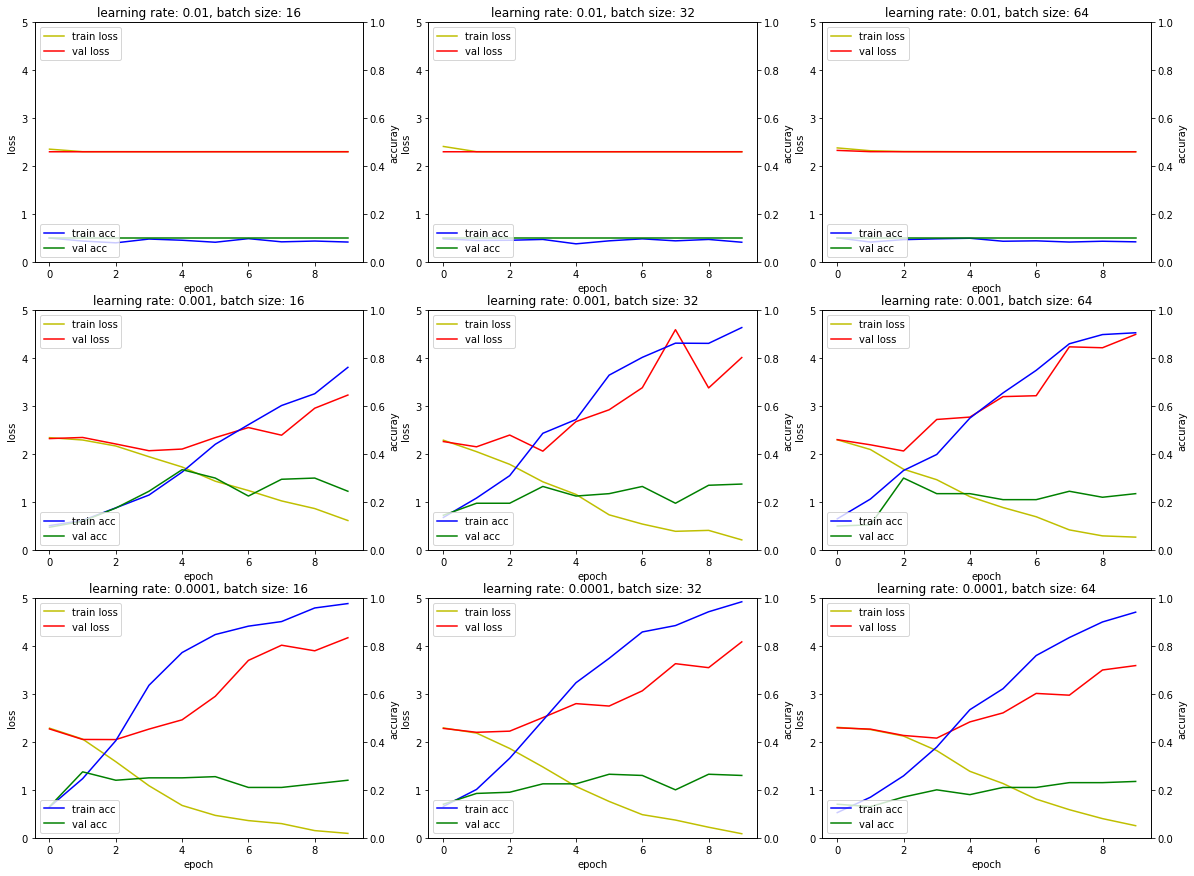

In [ ]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(3, 3, figsize=(20, 15))

for lr in range(len(learning_rates)):
  for bs in range(len(batch_sizes)):
    learning_rate = learning_rates[lr]
    batch_size = batch_sizes[bs]
    hist = model_history[lr * 3 + bs]

    acc_ax = loss_ax[lr][bs].twinx()
    loss_ax[lr][bs].plot(hist.history['loss'], 'y', label='train loss')  
    loss_ax[lr][bs].plot(hist.history['val_loss'], 'r', label='val loss')
    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')  
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
    loss_ax[lr][bs].set_xlabel('epoch')
    loss_ax[lr][bs].set_ylabel('loss')
    acc_ax.set_ylabel('accuray')
    loss_ax[lr][bs].legend(loc='upper left')
    acc_ax.legend(loc='lower left')
    loss_ax[lr][bs].set_title(f'learning rate: {learning_rate}, batch size: {batch_size}')
    loss_ax[lr][bs].set_ylim(0, 5)
    acc_ax.set_ylim(0, 1)

plt.savefig('hyperparameter')
plt.show()

# Retrain Model

In [ ]:
X = np.concatenate([x_train, x_val], axis = 0)
y = np.concatenate([y_train, y_val], axis = 0)

In [ ]:
timesteps = 10 # input frame numbers for LSTM
n_labels = 10 # Number of Dataset Labels
Learning_rate = 0.001 # Oprimizers lr, in this case, for adam
batch_size = 32
num_epochs = 50
img_col = 100 # Transfer model input size ( MobileNet )
img_row = 100 # Transfer model input size ( MobileNet )
img_channel = 3 # RGB

In [ ]:
# 2. Buliding a Model
# declare input layer for CNN+LSTM architecture
video = Input(shape=(22,img_col,img_row,img_channel))  # 22, 100, 100, 3
# Load transfer learning model that you want
model = applications.MobileNet(input_shape=(img_col,img_row,img_channel), weights="imagenet", include_top=False)
model.trainable = False
# FC Dense Layer
inputs = model.output
x = Flatten()(inputs)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.3)(x)
cnn_out = Dense(128, activation="relu")(x)
# Construct CNN model 
Lstm_inp = Model(inputs=model.input, outputs=cnn_out)
# Distribute CNN output by timesteps 
encoded_frames = TimeDistributed(Lstm_inp)(video)
# Contruct LSTM model 
encoded_sequence = LSTM(256)(encoded_frames)
hidden_Drop = Dropout(0.3)(encoded_sequence)
hidden_layer = Dense(128, activation="relu")(encoded_sequence)
outputs = Dense(n_labels, activation="softmax")(hidden_layer)
# Contruct CNN+LSTM model 
model = Model([video], outputs)
# 3. Setting up the Model Learning Process
# Model Compile 
adam = keras.optimizers.Adam(lr=Learning_rate, beta_1=0.9, beta_2=0.999, 
                             epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

# 4. Training the Model
hist = model.fit(X, y, batch_size=batch_size, 
                 shuffle=True, epochs=num_epochs)


Epoch 1/50
44/44 [==============================] - 24s 453ms/step - loss: 2.3023 - accuracy: 0.1264
Epoch 2/50
44/44 [==============================] - 21s 466ms/step - loss: 2.0061 - accuracy: 0.2729
Epoch 3/50
44/44 [==============================] - 20s 458ms/step - loss: 1.5089 - accuracy: 0.4414
Epoch 4/50
44/44 [==============================] - 20s 457ms/step - loss: 1.1017 - accuracy: 0.5693
Epoch 5/50
44/44 [==============================] - 20s 458ms/step - loss: 0.8448 - accuracy: 0.6743
Epoch 6/50
44/44 [==============================] - 20s 459ms/step - loss: 0.6647 - accuracy: 0.7586
Epoch 7/50
44/44 [==============================] - 20s 457ms/step - loss: 0.3846 - accuracy: 0.8629
Epoch 8/50
44/44 [==============================] - 20s 453ms/step - loss: 0.2903 - accuracy: 0.8879
Epoch 9/50
44/44 [==============================] - 20s 456ms/step - loss: 0.2162 - accuracy: 0.9314
Epoch 10/50
44/44 [==============================] - 20s 458ms/step - loss: 0.2196 - accura

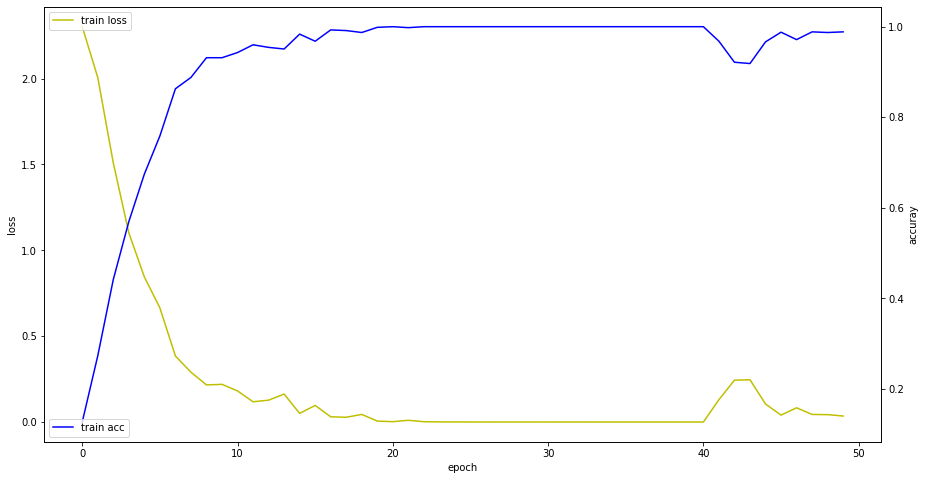

In [ ]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(15, 8))
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')  
#loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')  
#acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.savefig('final_performance')
plt.show()

# Test Model

In [ ]:
y_pred = model.predict(x_test)

4/4 [==============================] - 2s 307ms/step


In [ ]:
import sklearn
from sklearn.metrics import log_loss
from sklearn.metrics import top_k_accuracy_score

logloss = log_loss(y_test, y_pred)
top1_accuracy = top_k_accuracy_score(y_test, y_pred, k = 1)
top2_accuracy = top_k_accuracy_score(y_test, y_pred, k = 2)
top3_accuracy = top_k_accuracy_score(y_test, y_pred, k = 3)

print('final model log loss:', logloss)
print('final model top 1 accuracy:', top1_accuracy)
print('final model top 2 accuracy:', top2_accuracy)
print('final model top 3 accuracy:', top3_accuracy)

final model log loss: 5.856795053599635
final model top 1 accuracy: 0.21
final model top 2 accuracy: 0.4
final model top 3 accuracy: 0.56


#Save model

In [ ]:
# 6. Using the Model
model.save('Final_Model.h5')

# Hyperparemeter Optimization

In [ ]:
!pip install "ray[tune]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57.4 MB 170 kB/s 
     |████████████████████████████████| 8.8 MB 78.6 MB/s 
     |████████████████████████████████| 125 kB 111.1 MB/s 
     |████████████████████████████████| 468 kB 81.5 MB/s 


In [ ]:
import tensorflow as tf
from tensorflow import keras

import ray
from ray import tune
from ray.tune.integration.keras import TuneReportCallback

In [ ]:
def train_MIRACL_V1(config):
    timesteps = 22 # input frame numbers for LSTM
    n_labels = 10 # Number of Dataset Labels
    num_epochs = 3
    img_col = 100 # Transfer model input size ( MobileNet )
    img_row = 100 # Transfer model input size ( MobileNet )
    img_channel = 3 # RGB
    Learning_rate = config["lr"] # Oprimizers lr, in this case, for adam
    batch_size = int(config["batch_size"])
    dropout_prob = config["dropout_prob"]

    # 2. Buliding a Model
    # declare input layer for CNN+LSTM architecture
    video = Input(shape=(timesteps,img_col,img_row,img_channel))  # 22, 100, 100, 3
    # Load transfer learning model that you want
    model = applications.MobileNet(input_shape=(img_col,img_row,img_channel), weights="imagenet", include_top=False)
    model.trainable = False
    # FC Dense Layer
    inputs = model.output
    x = Flatten()(inputs)
    x = Dense(1024, activation="relu")(x)
    x = Dropout(dropout_prob)(x)
    cnn_out = Dense(128, activation="relu")(x)
    # Construct CNN model 
    Lstm_inp = Model(inputs=model.input, outputs=cnn_out)
    # Distribute CNN output by timesteps 
    encoded_frames = TimeDistributed(Lstm_inp)(video)
    # Contruct LSTM model 
    encoded_sequence = LSTM(256)(encoded_frames)
    hidden_Drop = Dropout(dropout_prob)(encoded_sequence)
    hidden_layer = Dense(128, activation="relu")(encoded_sequence)
    outputs = Dense(n_labels, activation="softmax")(hidden_layer)
    # Contruct CNN+LSTM model 
    model = Model([video], outputs)
    # 3. Setting up the Model Learning Process
    # Model Compile 
    adam = keras.optimizers.Adam(lr=Learning_rate, beta_1=0.9, beta_2=0.999, 
                                epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

    # 4. Training the Model
    hist = model.fit(x_train, y_train, batch_size=batch_size, 
                    validation_data=(x_val, y_val), shuffle=True, 
                    epochs=num_epochs,
                    callbacks=[TuneReportCallback({"mean_accuracy": "accuracy"})])

In [ ]:
# Grid Search
grid_search = tune.run(
        train_MIRACL_V1,
        name="grid_exp",
        metric="mean_accuracy",
        mode="max",
        stop={
            "mean_accuracy": 0.99,
        },
        resources_per_trial={
            "gpu": 1,
        },
        config={
            "lr": tune.grid_search([0.001, 0.0001, 0.00001]),
            "batch_size": tune.grid_search([16, 32, 64]),
            "dropout_prob": tune.uniform(0, 1)
        })

2022-12-18 17:28:10,772	INFO worker.py:1538 -- Started a local Ray instance.
